In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score
# 데이터 생성
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer

In [ ]:
# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
print(f"X: {X}")
print(f"y: {y}")

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"len(X_train): {len(X_train)}")

In [ ]:
# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측
y_pred = lin_reg.predict(X_test)

print(y_pred)

Mean Squared Error: 0.9177532469714291
R^2 Score: 0.6521157503858556


In [ ]:
# 평가
mse = mean_squared_error(y_test, y_pred)    # 평균제곱오차
r2 = r2_score(y_test, y_pred)               # 결정계수

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

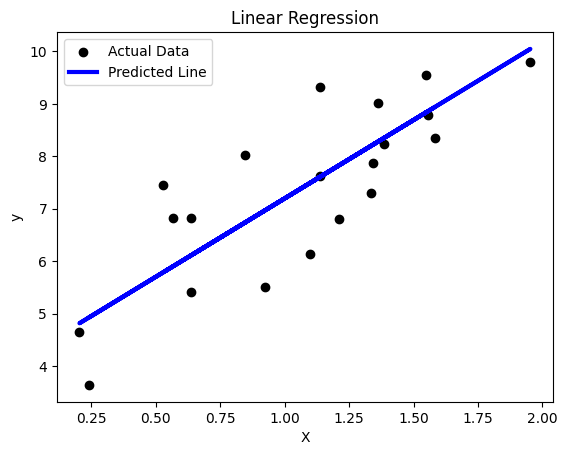

In [ ]:
# 시각화
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
print(f"X: {X}")
print(f"y: {y}")

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
nb = GaussianNB()
nb.fit(X_train, y_train)

# 예측
y_pred = nb.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


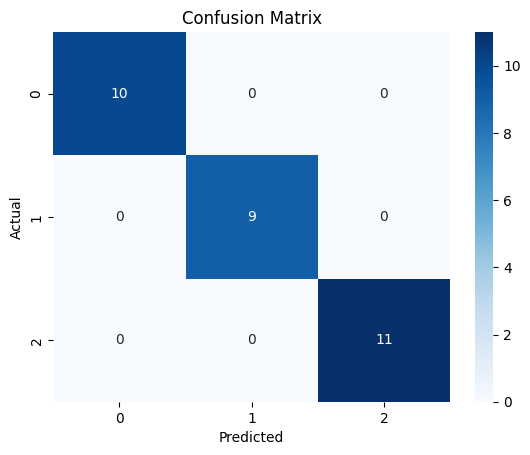

In [ ]:
# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 데이터 생성
digits = load_digits()
X = digits.data
y = digits.target

print(f"X: {X}")
print(f"y: {y}")

In [ ]:
# 모델 생성
nb = GaussianNB()

# 교차 검증
scores = cross_val_score(nb, X, y, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Mean CV Score: {np.mean(scores)}')

Cross-validation scores: [0.78055556 0.78333333 0.79387187 0.8718663  0.80501393]
Mean CV Score: 0.8069281956050759


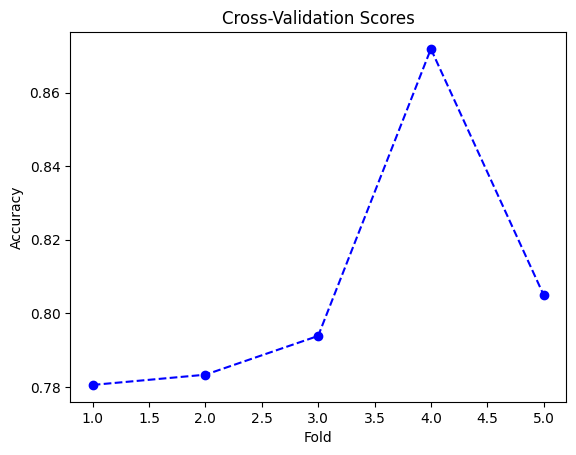

In [ ]:
# 시각화
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

In [ ]:
# 데이터 생성
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
nb = GaussianNB()
nb.fit(X_train, y_train)

# 예측
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[40  3]
 [ 0 71]]


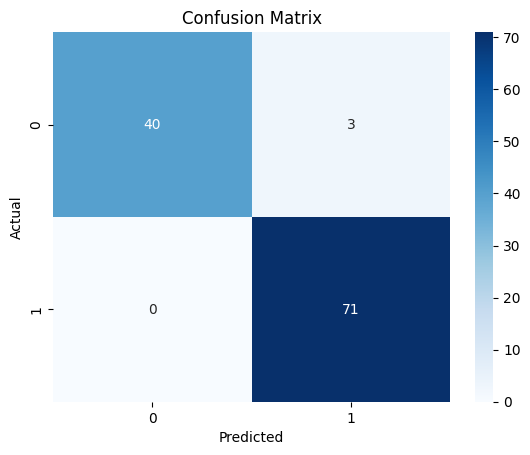

In [ ]:
# 시각화 - 혼동 행렬
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC 및 AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9983622666229938


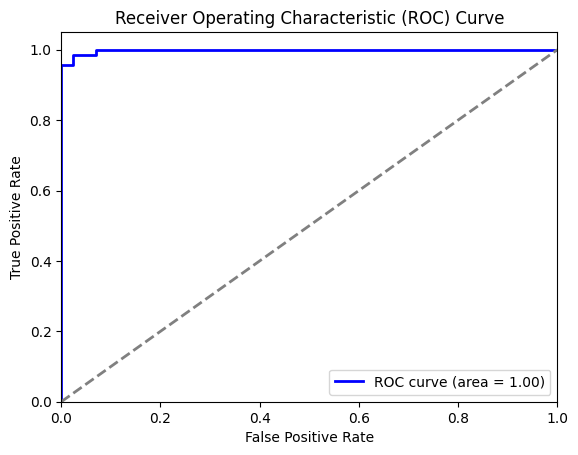

In [ ]:
# 시각화 - ROC 곡선
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()